# Part I - Ford GoBike Dataset Exploration 
## by LASNAMI Fella Souhila

## Introduction
> Le dataset  contient des informations sur les voyages effectuées avec les vélos de Ford GoBIke à San Franssisco durant le mois de fevrier 2019



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
data=pd.read_csv("fordgobike-tripdata.csv")
data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [124]:
data.shape

(183412, 16)

### What is the structure of your dataset?

> Le dataset fordgobike contient 183412 entrées et 16 variables:
- duration_sec: durée du voyage en secondes
- start_time: Date et heure de début
- end_time: Date et heure de fin
- start_station_id: ID de la station de départ
- start_station_name: Nom de la station de départ
- start_station_latitude: latitude de la station de départ
- start_station_longitude: longitude de la station de départ
- end_station_id: ID de la station d'arrivée
- end_station_name: Nom de la station d'arrivée
- end_station_latitude: Latitude de la station d'arrivée
- end_station_longitude: Longitude de la station d'arrivée
- bike_id: Id du vélo
- user_type: Type d'utilisateur (Subscriber=abonné ou Customer=client)
- member_birth_year: année de naissance de membre
- member_gender: sexe du membre
- bike_share_for_all_trip: si le membre est inscrit ou pas au programme "Bike Share for All" pour les résidents à faible revenue

### What is/are the main feature(s) of interest in your dataset?

> Les features principaux selon moi sont la durée du voyage, les horraires de départ et d'arrivée et les stations de départ et d'arrivée pour permettre à Ford de mieux répartir ses vélos.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Les features qui me seront le plus utiles sont : start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name

### Data Preprocessing

Dans cette partie nous allons vérifier les types des données, les valeurs manquantes et dupliquées ainsi que les problémes de qualité pour pouvoir les corriger par la suite

In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


### Valeurs nulles

In [126]:
#le nombre de valeurs manquantes
data.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

on remarque qu'il y a:
- 197 valeurs manquantes dans start_station_id, start_station_name, end_station_id et end_station_name
- 8265 valeurs manquantes dans member_birth_year et member_gender

Nous allons extraire les latitudes des stations qui n'ont pas de noms et verifier s'il existe des entrées avec la meme latitude et longitude pour remplir les valeurs nulles

In [127]:
#l'entrée où bike_share_for_all_trip est nulle
data.query("@pd.isna(bike_share_for_all_trip)", engine='python')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip


On remarque que c'est l'entrée où les variables qui contiennent un seule valeur nulle sont nulles. Donc supprimer 1 seule ligne revient à éliminer les valeurs nulles de 5 variables

In [128]:
#les entrées où les noms des stations de départ manque
data.query("@pd.isna(end_station_name)", engine='python')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
475,1709,2019-02-28 20:55:53.9320,2019-02-28 21:24:23.7380,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4211,Customer,1991.0,Female,No
1733,1272,2019-02-28 18:32:34.2730,2019-02-28 18:53:46.7270,NaN,NaN,37.40,-121.94,NaN,NaN,37.41,-121.96,4174,Subscriber,1980.0,Male,No
3625,142,2019-02-28 17:10:46.5290,2019-02-28 17:13:09.4310,NaN,NaN,37.41,-121.95,NaN,NaN,37.41,-121.96,4283,Subscriber,1988.0,Male,No
4070,585,2019-02-28 16:28:45.9340,2019-02-28 16:38:31.3320,NaN,NaN,37.39,-121.93,NaN,NaN,37.40,-121.92,4089,Subscriber,1984.0,Male,Yes
5654,509,2019-02-28 12:30:17.1310,2019-02-28 12:38:46.3290,NaN,NaN,37.40,-121.92,NaN,NaN,37.39,-121.93,4089,Subscriber,1984.0,Male,Yes
6214,1334,2019-02-28 10:32:47.9300,2019-02-28 10:55:02.0280,NaN,NaN,37.40,-121.93,NaN,NaN,37.38,-121.93,4150,Customer,1990.0,Male,No
8499,240,2019-02-28 08:23:07.0920,2019-02-28 08:27:07.2890,NaN,NaN,37.41,-121.96,NaN,NaN,37.41,-121.95,4283,Subscriber,1988.0,Male,No
8783,883,2019-02-28 07:58:07.3720,2019-02-28 08:12:51.2760,NaN,NaN,37.41,-121.96,NaN,NaN,37.40,-121.94,4211,Subscriber,1980.0,Male,No
10967,116,2019-02-27 19:25:57.0360,2019-02-27 19:27:54.0260,NaN,NaN,37.41,-121.95,NaN,NaN,37.41,-121.95,4283,Subscriber,1988.0,Male,No
11071,828,2019-02-27 19:03:14.6380,2019-02-27 19:17:03.4340,NaN,NaN,37.40,-121.94,NaN,NaN,37.41,-121.96,4091,Subscriber,1980.0,Male,No


In [129]:
#les entrées où les noms des stations de départ manquent
data.query("@pd.isna(start_station_name)", engine='python')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
475,1709,2019-02-28 20:55:53.9320,2019-02-28 21:24:23.7380,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4211,Customer,1991.0,Female,No
1733,1272,2019-02-28 18:32:34.2730,2019-02-28 18:53:46.7270,NaN,NaN,37.40,-121.94,NaN,NaN,37.41,-121.96,4174,Subscriber,1980.0,Male,No
3625,142,2019-02-28 17:10:46.5290,2019-02-28 17:13:09.4310,NaN,NaN,37.41,-121.95,NaN,NaN,37.41,-121.96,4283,Subscriber,1988.0,Male,No
4070,585,2019-02-28 16:28:45.9340,2019-02-28 16:38:31.3320,NaN,NaN,37.39,-121.93,NaN,NaN,37.40,-121.92,4089,Subscriber,1984.0,Male,Yes
5654,509,2019-02-28 12:30:17.1310,2019-02-28 12:38:46.3290,NaN,NaN,37.40,-121.92,NaN,NaN,37.39,-121.93,4089,Subscriber,1984.0,Male,Yes
6214,1334,2019-02-28 10:32:47.9300,2019-02-28 10:55:02.0280,NaN,NaN,37.40,-121.93,NaN,NaN,37.38,-121.93,4150,Customer,1990.0,Male,No
8499,240,2019-02-28 08:23:07.0920,2019-02-28 08:27:07.2890,NaN,NaN,37.41,-121.96,NaN,NaN,37.41,-121.95,4283,Subscriber,1988.0,Male,No
8783,883,2019-02-28 07:58:07.3720,2019-02-28 08:12:51.2760,NaN,NaN,37.41,-121.96,NaN,NaN,37.40,-121.94,4211,Subscriber,1980.0,Male,No
10967,116,2019-02-27 19:25:57.0360,2019-02-27 19:27:54.0260,NaN,NaN,37.41,-121.95,NaN,NaN,37.41,-121.95,4283,Subscriber,1988.0,Male,No
11071,828,2019-02-27 19:03:14.6380,2019-02-27 19:17:03.4340,NaN,NaN,37.40,-121.94,NaN,NaN,37.41,-121.96,4091,Subscriber,1980.0,Male,No


On remarque que c'est le meme tableau est que ces 197 entrées seuelement manquent de noms de stations de départ et d'arrivée.On verifie si les latitudes de ces stations existent ailleurs dans le dataset afin de pouvoir récupérer les noms des stations et remplir les vides

In [130]:
#verifier s'il existe des stations de départ avec les latitudes des stations manquantes mais où le nom n'est pas manquant
data.query("@pd.notna(start_station_name) and (end_station_longitude==-121.93 or end_station_longitude==-121.96 or end_station_longitude==-121.92 or end_station_longitude==-121.94 or end_station_longitude==-121.95 )", engine='python')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip


In [131]:
#verifier s'il existe des stations d'arrivée avec les latitudes des stations manquantes mais où le nom n'est pas manquant
data.query("@pd.notna(end_station_name) and (end_station_longitude==-121.93 or end_station_longitude==-121.96 or end_station_longitude==-121.92 or end_station_longitude==-121.94 or end_station_longitude==-121.95 )", engine='python')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip


On n'a pas dans le dataset des entrées qui contiennent les noms des stations qui nous manquent donc on peut pas remplacer les valeurs nulles, on devra alors supprimer ces 197 lignes

On verifie si les mêmes lignes qui manquent de member_birth_year manquent aussi de member gender

In [134]:
#les entrées où les 2 variables sont nulles en même temps
data.query("@pd.isna(member_birth_year) and @pd.isna(member_gender)", engine='python').count()

duration_sec               8265
start_time                 8265
end_time                   8265
start_station_id           8263
start_station_name         8263
start_station_latitude     8265
start_station_longitude    8265
end_station_id             8263
end_station_name           8263
end_station_latitude       8265
end_station_longitude      8265
bike_id                    8265
user_type                  8265
member_birth_year             0
member_gender                 0
bike_share_for_all_trip    8265
dtype: int64

In [135]:
#les entrées où au moins l'une des 2 variables est nulle
data.query("@pd.isna(member_birth_year) or @pd.isna(member_gender)", engine='python').count()

duration_sec               8265
start_time                 8265
end_time                   8265
start_station_id           8263
start_station_name         8263
start_station_latitude     8265
start_station_longitude    8265
end_station_id             8263
end_station_name           8263
end_station_latitude       8265
end_station_longitude      8265
bike_id                    8265
user_type                  8265
member_birth_year             0
member_gender                 0
bike_share_for_all_trip    8265
dtype: int64

On remarque que le nombre d'entrées où au moins l'une des 2 variables et nulle est égale au nombre d'entrée où les 2 variables sont nulles en même temps.Donc on aura à supprimer uniquement 8265 entrées et pas plus.

le nombre d'entrées à supprimer est de 8462:
>8265 entrées où des données des utilisateurs manquent, et 197 entrées où des informations des stations manquent en sachant que la ligne où les autres variables sont nulles est incluse dans les 388 entrées où des données des utilisateurs manquent


In [137]:
#le pourcentage de données à supprimer
8462/data.shape[0]

0.04613656685494951

On aura a supprimer 4% des données ce qui est correct

### Valeurs dupliquées

In [138]:
sum(data.duplicated())

0

Il n'y a pas de valeur dupliquées

### Type de données

In [139]:
data.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

Problemes:
- start_time et end_time sont de types object
- start_station_id, end_station_id, bike_id et member_birth_year sont de type float

### Structure des données

problémes:
- nous avons besoin de l'heure et du jour de départ et d'arrivée
- nous avons besoin de l'age des utilisateurs plutôt que de leur année de naissance

## Résumé

Ce que nous devrons régler dans la phase de nettoyage:
- supprimer les 396 entrées où il y 'a des valeurs manquantes
- modifier les types de données erronés
- ajouter des colonnes day et hour pour le jour et l'heure de départ et d'arrivée
- transformer l'année de naissance en age 

### Cleaning

In [140]:
#create a copy of the dataset
data_clean=data.copy()

#### Define
Supprimer les entrées où il y a des valeurs manquantes

#### Code

In [141]:
data_clean.dropna(inplace=True)

#### Test

In [142]:
print("le nombre de lignes aprés supression: {}".format(data_clean.shape[0]))
data_clean.isnull().sum()

le nombre de lignes aprés supression: 174952


duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

Nous n'avons plus de valeurs manquantes

#### Define
Changer le types des données comme suit:
- start_time et end_time de type object à datetime
- start_station_id, end_station_id, bike_id et member_birth_year de type float à int

#### Code

In [145]:
dtype= {'start_time': 'datetime64', 
        'end_time': 'datetime64',
        'start_station_id': 'int64',
        'end_station_id': 'int64',
        'bike_id': 'int64',
        'member_birth_year': 'int64'}

data_clean = data_clean.astype(dtype)


#### Test

In [146]:
#verifier le type de données
data_clean.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                    int64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                      int64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                   int64
member_gender                      object
bike_share_for_all_trip            object
dtype: object

Le types de données ont bien été modifiées

#### Define
extraire le jour et l'heure de départ et d'arrivée

#### Code

In [147]:
data_clean['start_day']= pd.DatetimeIndex(data_clean['start_time']).day
data_clean['end_day']= pd.DatetimeIndex(data_clean['end_time']).day
data_clean['start_hour']= pd.DatetimeIndex(data_clean['start_time']).hour
data_clean['end_hour']= pd.DatetimeIndex(data_clean['end_time']).hour

#### Test

In [148]:
data_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_day,end_day,start_hour,end_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,28,1,17,8
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,28,1,12,5
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,28,1,17,4
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,28,1,23,0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,28,1,23,0


**Remarque:**
    nous n'avons plus besoin de start_time et end_time on va alors les supprimer

In [149]:
data_clean.drop(columns=['start_time','end_time'],inplace=True)
data_clean.head(1)

,duration_sec,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_day,end_day,start_hour,end_hour
0,52185,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,28,1,17,8


### Define:
transformer member_birth_year en member_age

### Code

In [150]:
data_clean.member_birth_year=data_clean.member_birth_year.apply(lambda x:2022-x)
data_clean.rename(columns={'member_birth_year':'member_age'},inplace=True)

### Test

In [151]:
data_clean.head()

,duration_sec,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_age,member_gender,bike_share_for_all_trip,start_day,end_day,start_hour,end_hour
0,52185,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,38,Male,No,28,1,17,8
2,61854,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,50,Male,No,28,1,12,5
3,36490,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,33,Other,No,28,1,17,4
4,1585,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,48,Male,Yes,28,1,23,0
5,1793,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,63,Male,No,28,1,23,0


On a extrait l'age

In [152]:
#enregistrer le dataset
data_clean.to_csv('fordgobike_clean.csv',encoding='utf_8',index=False)

## Univariate Exploration



In [2]:
df=pd.read_csv('fordgobike_clean.csv')
df.head()

,duration_sec,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_age,member_gender,bike_share_for_all_trip,start_day,end_day,start_hour,end_hour
0,52185,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,38,Male,No,28,1,17,8
1,61854,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,50,Male,No,28,1,12,5
2,36490,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,33,Other,No,28,1,17,4
3,1585,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,48,Male,Yes,28,1,23,0
4,1793,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,63,Male,No,28,1,23,0


In [3]:
#definir une fonction pour plotter un pie chart
def piechart(data,labels,colors,title):
    #definir l taille de la figure
    plt.figure(figsize=[5,5])

    # réaliser le Pie Chart
    plt.pie(data, colors=colors, labels=labels,autopct='%1.1f%%', pctdistance=0.85) 

    # dessiner le cercle
    centre_circle=plt.Circle((0, 0), 0.70, fc='white')
    fig=plt.gcf()

    # ajouter le cercle
    fig.gca().add_artist(centre_circle)

    #ajouter un titre
    plt.title(title);


#### Question 1:
combien y a t il de personnes inscrites ou non au programme bike share for all trip?

#### Visualisation:

In [4]:
#grouper selon le sexe et trouver le nombre de clients
genders=df.groupby('member_gender').size()
genders=genders.reset_index(name='nombre')
#extraire la liste des sexes
genres=genders.member_gender.tolist()
#extraire la liste des nombres selon le sexe
nombre=genders.nombre.tolist()
print (genres)
print(nombre)
genders

['Female', 'Male', 'Other']
[40805, 130500, 3647]


,member_gender,nombre
0,Female,40805
1,Male,130500
2,Other,3647


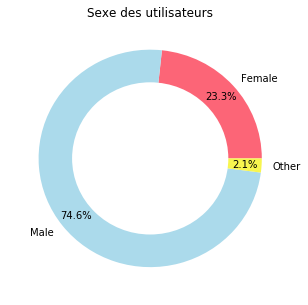

In [5]:
colors=['#fc6577','#abdaeb','#f7f54f']
title='Sexe des utilisateurs'
piechart(data=nombre,labels=genres,colors=colors,title=title)

#### Observation:
on remarque que la majorité des utilisateurs sont des hommes (prés de 75%)


#### Question 2 :
quel est le type d'utilisateur?

#### Visualisation:

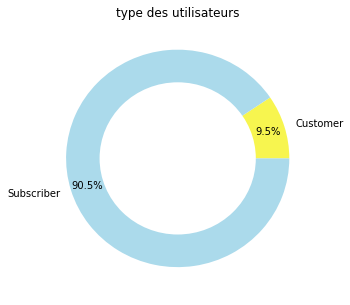

In [6]:
#group by du type des clients
user_types=df.groupby('user_type').size().reset_index(name='nb')
#extraire les types, lenombre d'utilisateur de chaque type
types=user_types.user_type.tolist()
count=user_types.nb.tolist()
colors=['#f7f54f','#abdaeb']
title='type des utilisateurs'
#générer le pie chart
piechart(data=count,labels=types,colors=colors,title=title)


#### Observation:

On remarque que plus de 90% des utilisateurs sont des abonnés

#### Question 3
Que represente le pourcentage des personnes beneficiant du programme bike Share for all trip

#### Visualisation

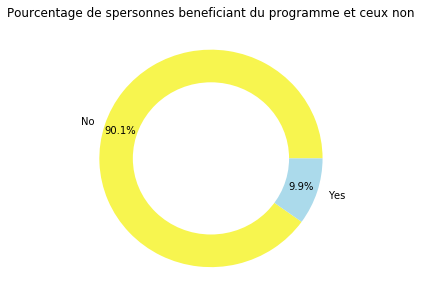

In [7]:
#group by du type des clients
program=df.groupby('bike_share_for_all_trip').size().reset_index(name='nb')
#extraire les types, lenombre d'utilisateur de chaque type
programs=program.bike_share_for_all_trip.tolist()
count=program.nb.tolist()
colors=['#f7f54f','#abdaeb']
title='Pourcentage de spersonnes beneficiant du programme et ceux non'
#générer le pie chart
piechart(data=count,labels=programs,colors=colors,title=title)

#### Observation:
On remarque que plus de 90% aussi ne sont pas affiliés au programme. 

#### Question 4:
Quelles est le nombre de départs de chaque station ?

#### Visualisation

In [8]:
# creer une fonction pour récuperer les 15 stations les plus visitées
def get_most_visited_stations(variable):
    #grouper selon les stations et en extraire le nombre
    stations=df.groupby(variable).size().reset_index(name='nb')
    stations.head()
    #ordonner le dataframe par ordre décroissant
    sorted_stations = stations.sort_values(["nb"], ascending=False)
    #prendre les 15 plus grandes valeurs
    most_visited_stations=sorted_stations.iloc[:15,:]
    return most_visited_stations

In [9]:
#utiliser la fonction
start_stations=get_most_visited_stations('start_station_name')

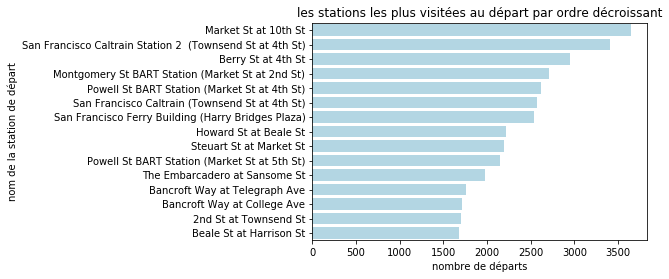

In [71]:
#afficher un barchart horizontal
sb.barplot(data=start_stations,y='start_station_name',x='nb',color='#abdaeb');
plt.xlabel('nombre de départs');
plt.ylabel('nom de la station de départ');
plt.title('les stations les plus visitées au départ par ordre décroissant');

#### Observations:
- Les 15 stations avec le plus de départs ont un nombre de départs entre 1500 et 3500.
- La station Market St at 10th St est celle qui a eu le plus de départ en 2019 

#### Question 5:
Quels stations ont le plus d'arrivées

#### Visualisation:

In [11]:
#utiliser la fonction
end_stations=get_most_visited_stations('end_station_name')

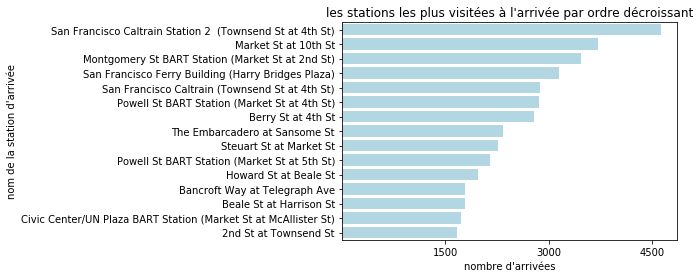

In [73]:
#afficher un bart chart horizontal
sb.barplot(data=end_stations,y='end_station_name',x='nb',color='#abdaeb');
plt.xlabel('nombre d\'arrivées');
plt.ylabel('nom de la station d\'arrivée');
plt.xticks([1500,3000,4500],['1500','3000','4500'])
plt.title('les stations les plus visitées à l\'arrivée par ordre décroissant');

#### Observation:
- Les 15 stations avec le plus de départs ont un nombre de départs entre 1500 et 4500.
- La station San Francisco Caltrain Station 2 est celle qui a eu le plus de départ en 2019 
- A priori on remarque que les memes noms de stations de départ réapparaissent, nous allons confirmer cela

In [13]:
#on extrait la liste des station de départ et on l'ordonne
ends_list=end_stations.end_station_name.tolist().sort()
#on extrait la liste des station d'arrivée et on l'ordonne
starts_list=start_stations.start_station_name.tolist().sort()
#on teste si elles sont égales
ends_list==starts_list

True

Effectivement, les stations qui ont le plus de départs sont aussi celles avec le plus d'arrivées

#### Question 6:
On aimerait savoir quelle station de départ parmi les 15 les plus populaires a un taux plus élevé de personnes inscrites au programme 

#### Visualisation

In [14]:
#on récupére la liste des noms des stations
best_list=end_stations.end_station_name.tolist()
#On filtre le dataset pour prendre ceux ou le nom de la station de départ est inclut dans la liste
best=df[df['start_station_name'].isin(best_list)]
# on filtre pour obtenir les inscrits
inscrits=best[best['bike_share_for_all_trip']=='Yes']
#on récupere la liste des stations avec pour chaque station le nombre d'inscrits
liste_stations_inscrits=inscrits.start_station_name.value_counts().to_frame()
liste_stations_inscrits.head()

,start_station_name
Bancroft Way at Telegraph Ave,503
Powell St BART Station (Market St at 5th St),203
Powell St BART Station (Market St at 4th St),148
Market St at 10th St,137
Civic Center/UN Plaza BART Station (Market St at McAllister St),111


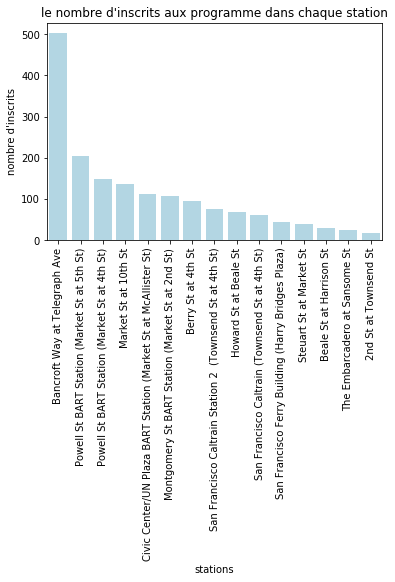

In [15]:
# on affiche un barplot
sb.barplot(data=liste_stations_inscrits,x=liste_stations_inscrits.index, y='start_station_name', color='#abdaeb');
plt.xticks(rotation=90);
plt.ylabel('nombre d\'inscrits');
plt.xlabel('stations');
plt.title('le nombre d\'inscrits aux programme dans chaque station');

#### Observation
On remarque que la plupart des personnes inscrites au programme démarrent de BrancfortWay, ils atteignent 500.
Le nombre d'inscrit qui démarrent de cette station dépasse le double dans les autres stations

#### Question 7:
Quelle est le nombre de voyages pour chaque jour du mois

#### Visualisation:

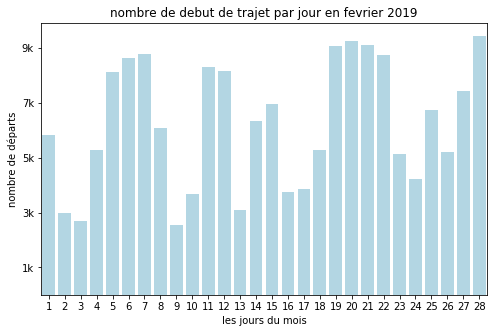

In [16]:
plt.figure(figsize=[8,5])
sb.countplot(data=df,x='start_day',color="#abdaeb");
plt.yticks([1000,3000,5000,7000,9000],['1k','3k','5k','7k','9k'])
plt.title('nombre de debut de trajet par jour en fevrier 2019');
plt.xlabel('les jours du mois');
plt.ylabel('nombre de départs');

#### Observations:

Les jours avec le moins de trajets sont le 2,3 et 9 avec moins de 3000 départs, tandis que les jours avec le plus grand nombre sont 19,20,21 et 28 avec environ plus de 9000 départs
Si on recherche le clanedrier de fevrier 2019, les weekends sont 2,3,,9,10,16,17,23et 24 du mois. Ces jours là une importante baisse est constaté par rapport aux autres jour de la semaine
On remarque que durant les autres jours de semaines le nombre de départ ne va pas au dessous de 4000 départ uniquement pour le mercredi 13

#### Question 8:
Quelles heures de la journée remarque on un taux plus élevé de trajets

#### Visualisation

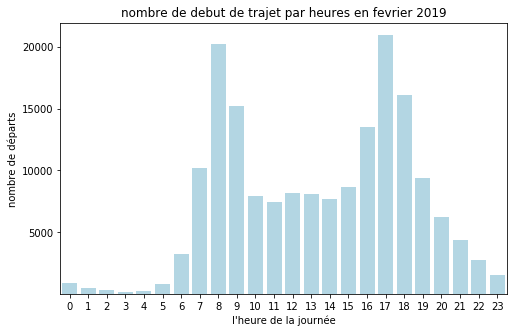

In [17]:
plt.figure(figsize=[8,5])
sb.countplot(data=df,x='start_hour',color="#abdaeb");
plt.yticks([5000,10000,15000,20000],['5000','10000','15000','20000'])
plt.title('nombre de debut de trajet par heures en fevrier 2019');
plt.xlabel('l\'heure de la journée');
plt.ylabel('nombre de départs');

#### Observations:
- On remarque que les 2 piques sont aux environs de 8h et 17h, les heures de début et fin de travail.
- Les valeurs atteignent 20000 departs à 8h et 17h durant le mois de février
- On peut alors supposer que beaucoup de clients utilisent FordGoBike comme moyen de transport quotidien pour aller au travail

#### Question 9:
on aimerait connaitre la distribution de la durée des trajets

#### Visualisation

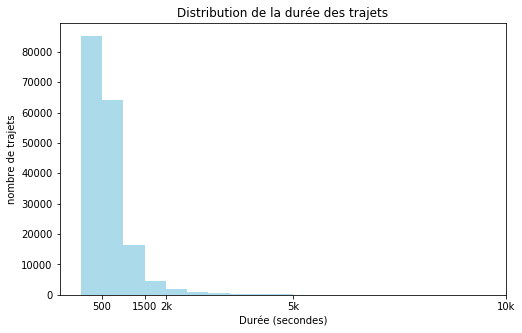

In [18]:
#On régle les bins et la taille de la figure
bins = np.arange(0, df['duration_sec'].max()+500, 500)
plt.figure(figsize=[8, 5])
#On plot l'histogramme avec le titre, les labels et les ticks
plt.hist(data = df, x = 'duration_sec', bins=bins,color='#abdaeb')
plt.title('Distribution de la durée des trajets')
plt.xlabel('Durée (secondes)')
plt.ylabel('nombre de trajets')
plt.xticks([500, 1500, 2000, 5000, 10000], ['500', '1500', '2k', '5k', '10k'])
plt.xlim(-500,10000)
plt.show()

#### Observation:
On remarque que la plupart des trajets durent moins de 1500 secondes (moins d'une demi heure)

### Discutez de la distribution de votre/vos variable(s) d'intérêt. Y avait-il des points inhabituels ? Avez-vous eu besoin d'effectuer des transformations ?

- On remarque que la majorité des utilisateurs sont des hommes, des abonnés et ne sont pas inscrit au programme d'aide.
- On remarque que les trajets sont plus fréquents les jours de semaine et aux alentours de 8h et 17h ce qui peut insinuer que les habitants de San Francisco utilisent les vélos de Ford GoBike comme moyen de transport pour aller au travail ou à l'école.
- On remarque aussi que parmi les stations, les 15 qui connaissent un grand nombre de départs sont aussi celles qui connaissent un grand nombre d'arrivées.C'est à dire que ces 15 stations sont les plus populaires.Cela peut avoir une relation avec le nombre d'habitants prés de ces stations là.
- On remarque que parmi ces stations, celle de BrancfortWay a le plus grand nombre d'inscrits au programme parmi les autres les plus populaire, ce nombre dépasse le double par rapport aux autres station.Cela peut avoir une relation avec la situation financiére des habitants prés de cette station.
- On remarque que les trajets , en grande partie, ne durent pas plus d'un demi heure


### Parmi les caractéristiques que vous avez étudiées, y avait-il des distributions inhabituelles ? Avez-vous effectué des opérations sur les données pour les mettre en ordre, les ajuster ou en modifier la forme ? Si oui, pourquoi l'avez-vous fait ?
> L'ajustement des données et la modification de la structure ont été faits lors de la phase de nettoyage

## Bivariate Exploration


#### Question 10
On aimerait savoir quelles sont les durées des trajets selon l'age des utilisateurs

#### Visualisation

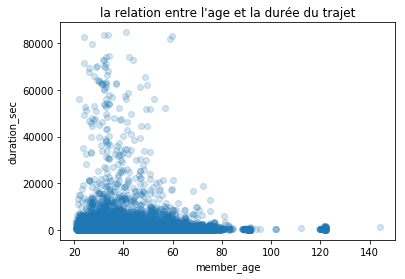

In [19]:
sb.regplot(data=df,x='member_age',y='duration_sec',fit_reg=False,x_jitter=0.4, scatter_kws={'alpha':0.2});
plt.title('la relation entre l\'age et la durée du trajet');

#### Observation:
Ici on remarque qu'il existe des points aberrants , ceux lorsque l'age dépasse 100 ans, cela est certainement du à une erreur de qualité que l'on a pas traité dans la partie nettoyage.
On remarque aussi que plus l'age augmente et plus les trajets ne sont pas longs 


#### Question 11:
Maintenant nous aimerions savoir est ce qu'en moyenne c'est toujours les jeunes qui font les trajets les plus longs

#### Visualisation:

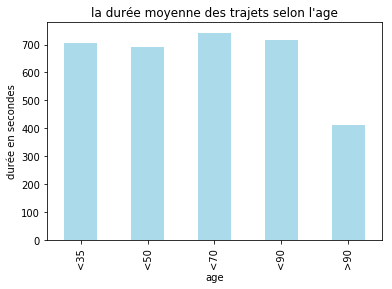

In [82]:
df["age_intervals"] = pd.cut(df["member_age"], bins=[0,35,50,70,90,140],include_lowest=True,labels=['<35','<50','<70','<90','>90'])
df.groupby(by="age_intervals")["duration_sec"].mean().plot(kind='bar',color="#abdaeb");
plt.xlabel('age');
plt.ylabel('durée en secondes'),
plt.title('la durée moyenne des trajets selon l\'age');

#### Observation:
On remarque que meme si les moins de 50 ans sont les personnes qui font les trajets les plus longs(atteignant 80000 secondes soit plus de 22 heures), mais en moyenne c'est les persones entre 50 et 70 ans suivis de ceux entre 70 et 90 ans

#### Question 12:
On veut connaitre la relation entre le type d'utilisateur et s'il est inscrit au programme

#### Visualisation:

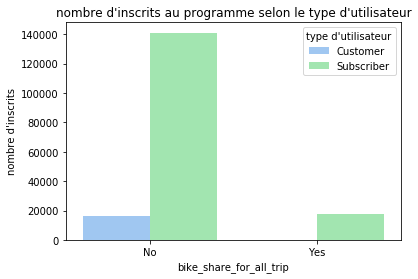

In [78]:
sb.countplot(data=df,hue='user_type',x='bike_share_for_all_trip',palette='pastel');
plt.ylabel('nombre d\'inscrits');
plt.title('nombre d\'inscrits au programme selon le type d\'utilisateur');
plt.legend(title='type d\'utilisateur');

#### Observations
On remarque que toutes les personnes qui sont inscrits au programme sont abonnés

#### Question 13:
On veut savoir si la majorité est inscrite ou non au programme, quel est le sexe et le type les plus répandu dans les 5 stations les plus visitées au départ.

#### Visualisation:


In [21]:
#on prend les 5 premiers
five=start_stations.iloc[:5,:].start_station_name.tolist()
#On cherche les ligne du dataset où le nom de la station de départ figure dans la liste
five_df=df[df['start_station_name'].isin(five)]

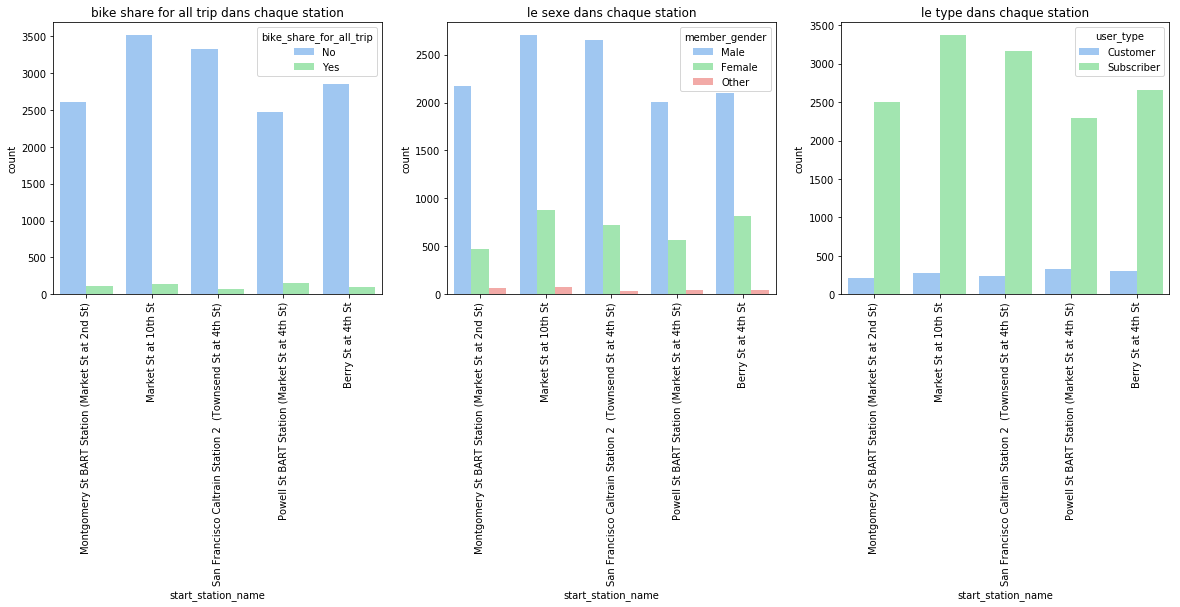

In [81]:
#on cree 3 subplots pour les differents criteres
plt.figure(figsize=[20,5])

#le subplot pour le programme
plt.subplot(1,3,1)
sb.countplot(data=five_df,hue='bike_share_for_all_trip',x='start_station_name',palette='pastel');
plt.xticks(rotation=90);
plt.title('bike share for all trip dans chaque station')

#le subplot pour le sexe
plt.subplot(1,3,2)
sb.countplot(data=five_df,hue='member_gender',x='start_station_name',palette='pastel');
plt.xticks(rotation=90);
plt.title('le sexe dans chaque station')

#le subplot pour le type
plt.subplot(1,3,3)
sb.countplot(data=five_df,hue='user_type',x='start_station_name',palette='pastel');
plt.title('le type dans chaque station')
plt.xticks(rotation=90);

#### Observation

Comme nous avons une majorité d'hommes, de personnes non inscrites dans le programme et d'abonnés, il est evident que l'on retrouve ces valeurs élevés.On ne peut pas faire de conclusion, elle serait injuste.


#### Question 14:
On veut analyser la relation entre les 15 stations de départ et d'arrivée les plus populaires

#### Visualisation

In [23]:
#on récupére la liste des noms des stations
best_list=end_stations.end_station_name.tolist()
#On filtre le dataset pour prendre ceux ou le nom de la station de départ est inclut dans la liste
best=df[df['start_station_name'].isin(best_list)]
#On filtre le dataset obtenu pour avoir ceux où le nom de la station d'arrivée est inclut dans la liste
#au final on aura uniquement ceux où le départ et l'arrivée font partie des 15 les plus populaires
best=best[best['end_station_name'].isin(best_list)]
best.head()

,duration_sec,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_age,member_gender,bike_share_for_all_trip,start_day,end_day,start_hour,end_hour
24,385,6,The Embarcadero at Sansome St,37.804770,-122.403234,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,6531,Customer,22,Male,No,28,28,23,23
106,542,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,1936,Subscriber,27,Male,No,28,28,22,23
109,376,58,Market St at 10th St,37.776619,-122.417385,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,5731,Subscriber,40,Male,No,28,28,23,23
141,325,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,5012,Subscriber,32,Male,No,28,28,22,22
157,4998,6,The Embarcadero at Sansome St,37.804770,-122.403234,16,Steuart St at Market St,37.794130,-122.394430,5149,Customer,35,Male,No,28,28,21,22


In [24]:
#on crée un tableau avec les lignes et les colonnes les stations de départ et d'arrivée et comme valeur le nombre
station_count=best.groupby(['start_station_name','end_station_name']).size().reset_index(name='number')
table=station_count.pivot(index='end_station_name',columns='start_station_name',values='number')
#remplacer les valeurs nulles
table.fillna(0,inplace=True)

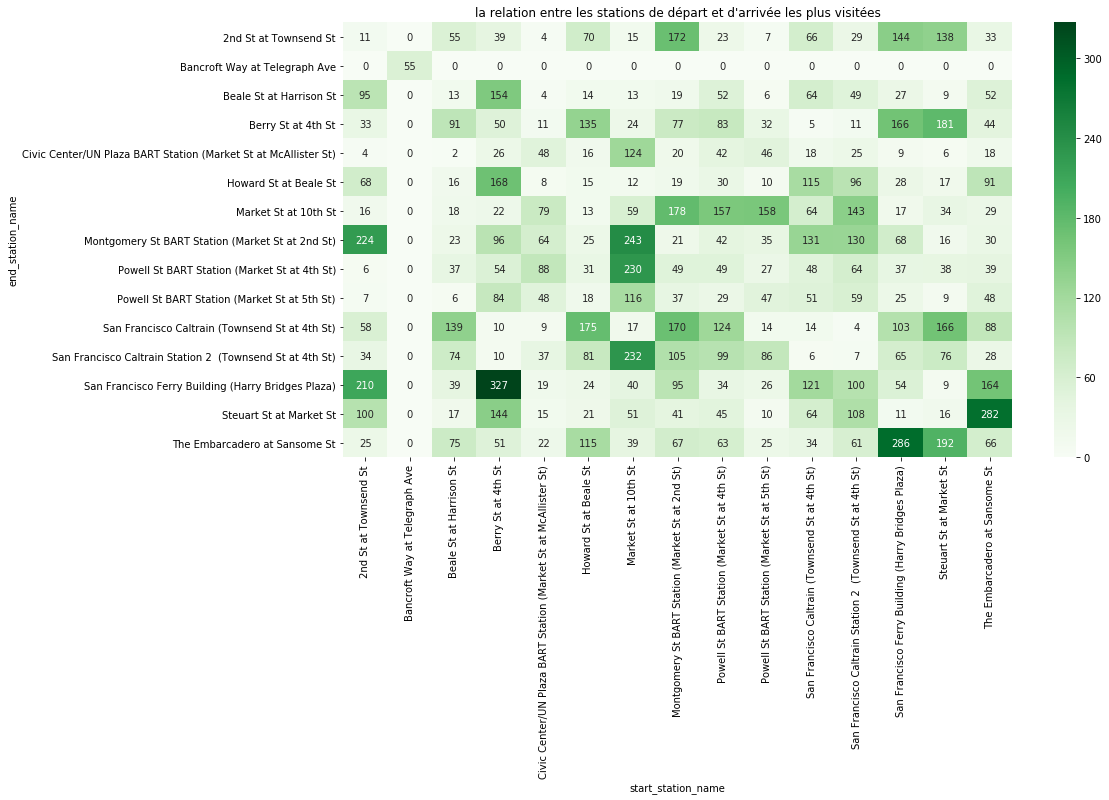

In [25]:
# afficher un heatmap
plt.figure(figsize=[15,8])
sb.heatmap(table,annot=True,fmt=".3g",cmap='Greens')
plt.title('la relation entre les stations de départ et d\'arrivée les plus visitées');

#### Observation

On remarque que :
- les personnes qui démarrent de Brancfort Way station ne remettent leurs vélos qu'à la meme station, et que cette station là ne reçoit aucune arrivée d'une autre station.
- Que le trajet le plus réalisé est celui de Berry St-San Francisco Ferry Building

#### Question 15:
On aimerait connaitre la relation entre le type d'utilisateur et la durée des trajets

#### Visualisation:

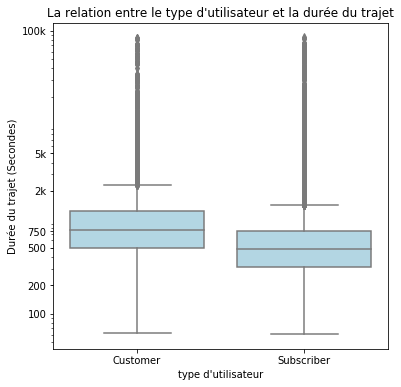

In [26]:
plt.figure(figsize=[6,6])
sb.boxplot(data=df,x='user_type',y='duration_sec',color='#abdaeb')
plt.yscale('log')
plt.yticks([100,200,500,750,2e3,5e3,100000],['100','200','500','750','2k','5k','100k'])
plt.xlabel('type d\'utilisateur')
plt.ylabel('Durée du trajet (Secondes)')
plt.title('La relation entre le type d\'utilisateur et la durée du trajet');

#### Observation

On remarque que les clients ont une moyenne et un mimimum plus élevés que les abonnées c'est à dire que leurs trajets prennent beaucoup plus de temps.

#### Question 16:


#### Visualisation

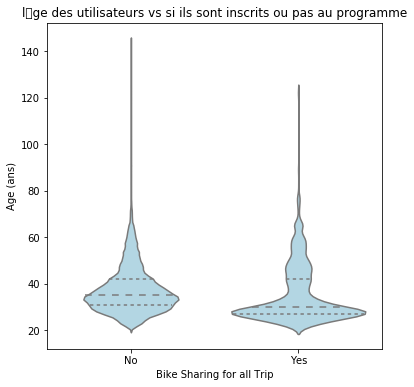

In [27]:
plt.figure(figsize=[6,6])
sb.violinplot(data=df,x='bike_share_for_all_trip',y='member_age',color='#abdaeb',inner='quartile')
plt.xlabel('Bike Sharing for all Trip')
plt.ylabel ('Age (ans)');
plt.title('l\age des utilisateurs vs si ils sont inscrits ou pas au programme');

#### Observation:
ici on remarque que parmi les personnes inscrites, un grand nombre a moin de 40 ans et que la moyenne d'age des inscrits est plus petite que celle des non inscrits

### Parlez de certaines des relations que vous avez observées dans cette partie de l'enquête. Comment la ou les caractéristiques qui vous intéressent ont-elles varié par rapport aux autres caractéristiques de l'ensemble de données ?

- On remarque que les personnes inscrites aux programmes en tandance a etre plus jeune que ceux qui ne sont pas inscrits
- On remarque que les personnes inscrites sont uniquement des abonnés
- On remarque que la station Market St contient le plus grand nombre d'abonnés, qui eux prennent moins de temps dans leurs trajets que les clients, et qu'elle contient aussi le plus grand nombre de femmes suivi par la station de St Berry mais qui celle ci contient le plus petit nombre d'abonnés parmi les  stations de départ les plus populaires.
- On remarque que les personnes qui démarrent de Brancfort Way station ne remettent leurs vélos qu'à la meme station, et que cette station là ne reçoit aucune arrivée d'une autre station.
- On remarque que le trajet le plus réalisé est celui de Berry St-San Francisco Ferry Building
- On remarque que les trajets les plus longs sont effectués par des personnes jeunes mais que la moyenne la plus élevée est atteinte par des personnes plus agées


### Avez-vous observé des relations intéressantes entre les autres caractéristiques (pas la ou les principales caractéristiques d'intérêt) ?

> je me suis intéréssée au informations sur les utilisateurs, ainsi que sur les trajets( durée, station de départ et d'arrivée)
On remarque tout de meme que les inscrit du programmes sont forcement des abonnés

## Multivariate Exploration


#### Question 17:
on aimerait connaitre la duree des trajets selon l'heure et le type d'utilisateur

#### Visualisation:

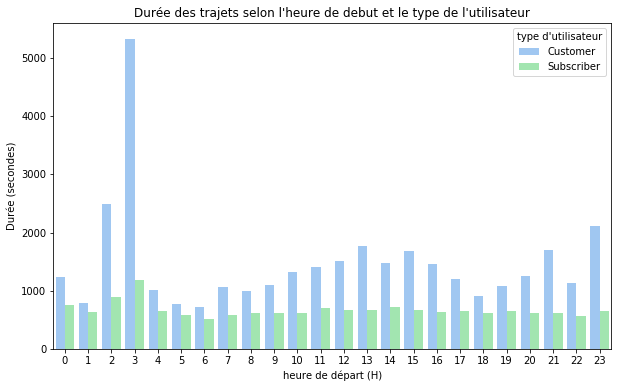

In [28]:
plt.figure(figsize=(10,6))
plt.title('Durée des trajets selon l\'heure de debut et le type de l\'utilisateur')
sb.barplot(data=df, x='start_hour', y='duration_sec', ci=None, hue='user_type',palette='pastel');
plt.legend(title='type d\'utilisateur');
plt.ylabel('Durée (secondes)');
plt.xlabel('heure de départ (H)');



#### Observation:

On remarque que les clients font toujours de plus longs trajets que les abonnés et qu'à 3h du matin les clients dépassent 5000 secondes ce dont l'on devrait chercher la cause

#### Question 18:

#### Visualisation:

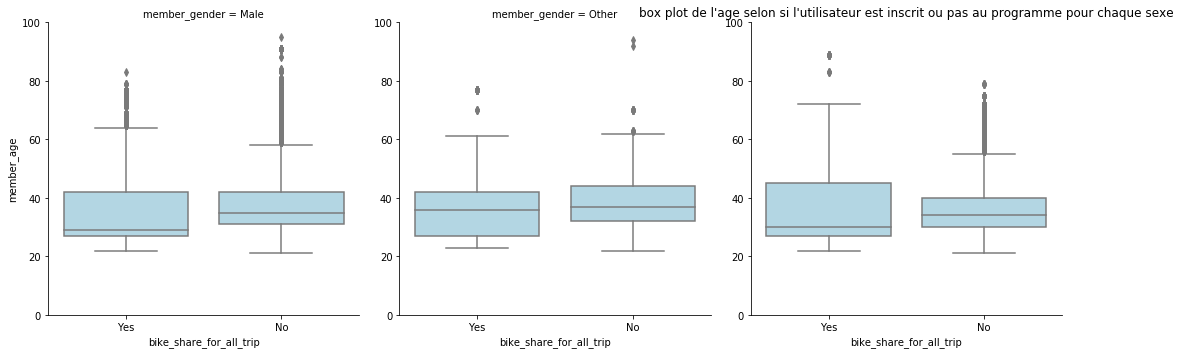

In [70]:
# afficher un Facetgrid de boxplot
g=sb.FacetGrid(data=df,col='member_gender',size=5,margin_titles=True)
g.map(sb.boxplot, 'bike_share_for_all_trip','member_age',order=['Yes','No'],color='#abdaeb');
g.set( ylim=(0, 100));
plt.title('box plot de l\'age selon si l\'utilisateur est inscrit ou pas au programme pour chaque sexe');

#### Observation:
On remarque que pour les hommes et les femmes 50% des personnes inscrites ont moins de 30 ans
On remarque aussi que pour les personnes inscrites, les femmes atteignent 70 ans 
On remrque que l'age minimum des inscrits ou non des differents sexes est approximativement le meme 

### Parlez de certaines des relations que vous avez observées dans cette partie de l'enquête. Y avait-il des caractéristiques qui se renforçaient mutuellement en termes d'observation de votre ou vos caractéristiques d'intérêt ?

- On remarque une élevation surprenante de la durée des trajets à 3 h du matin et que meme si les heures aux alentours de 8 et 17 heures sont où on a le plus grand nombre de trajet, la durée est basse par rapport aux autres heures.
- On remarque aussi que 50% des inscrits au programme ont moins de 30 ans peu importe le sexe, et que les femmes inscrites atteignent les 70 ans 

### Y a-t-il eu des interactions intéressantes ou surprenantes entre les caractéristiques ?

> Pas de remarques interessantes

## Conclusions
>Pour conclure voici les remarques les plus importantes à retenir:
- Qu'il existe des stations populaires ( avec le plus grand nombre de départs et d'arrivées)
- Que les utilisateurs sont majoritairement des hommes, des abonnés et des personnes non inscrites au programme
- Que les inscrits sont tous des abonnés et sont moins agés que les non inscrits
- Que le plus grand nombre d'abonnés et de femmes parmi les top 5 stations se trouvent à Market St station 
- Que de plus longs trajets sont effectués par les plus jeunes et à 3 h du matin, et sont effectués par des clients,mais que la moyenne la plus élevée est atteinte par des personnes plus agées
- Que le plus grand nombre de trajets sont effectués les jours de semaines et aux alentours de 8h et 17h et que les weekends un baisse du nombre de trajets est remarquée
